In [1]:
import spacy
from spacy_aligner.pipeline import Aligner
import json
import networkx as nx
import matplotlib.pyplot as plt

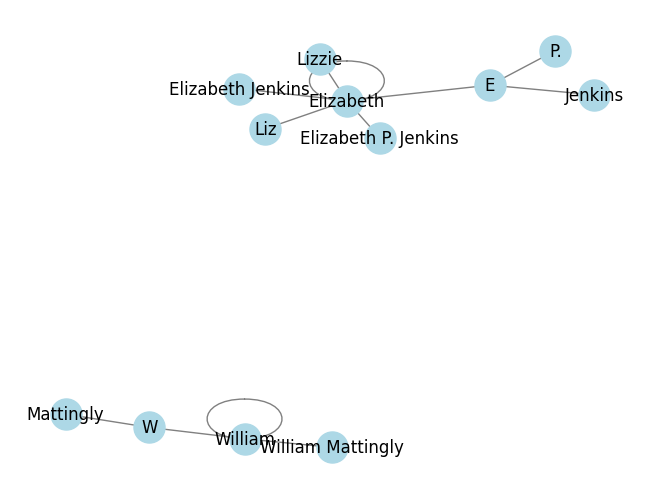

In [2]:
import spacy
from spacy_aligner.pipeline import Aligner
import json
import networkx as nx
import matplotlib.pyplot as plt

with open("assets/links.json", "r") as f:
    l = json.load(f)

l  = {"PERSON": l}

# Load the SpaCy model
nlp = spacy.load("en_core_web_lg")

# Add the custom pipeline component to the SpaCy pipeline
nlp.add_pipe("aligner", config={"links": l})


text = "Elizabeth Jenkins went to school. She works at Mattingly Autoparts. Liz is 20. She also goes by Lizzie. Mrs. Jenkins teaches students. Once she completes her PhD, she will be Dr. Elizabeth P. Jenkins. William also goes by Will. His full name is William Mattingly."

# Process the text
doc = nlp(text)

# Example function to visualize the graph
def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', linewidths=1, font_size=12)
    plt.show()

# Visualize the graph
visualize_graph(doc._.graph)

In [3]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Elizabeth Jenkins PERSON
Mattingly Autoparts ORG
Liz PERSON
20 DATE
Lizzie PERSON
Jenkins PERSON
PhD WORK_OF_ART
Elizabeth P. Jenkins PERSON
William PERSON
William Mattingly PERSON
